<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="25%"><img src="../../../media/decartes.jpg"
alt="DeCART Icon" width="128" height="171"><br>
</td>
<td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">DeCART Summer School<br>
for<br>
Biomedical Data Science</font></h1></td>
<td valign="center" align="center" width="25%"><img
src="../../../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>

# Compression and Archiving

Data are often [compressed](https://en.wikipedia.org/wiki/Data_compression) to reduce file sizes for saving disk space or decrease transmission time. Compression takes advantage of redundancy in the data to come up with a more efficient representation of the data. To get an idea of what I mean by redundancy, we'll take as an example a CT image of the chest.

CT images are reconstructed on a 512x512 array, but only the circle in the center contains any rendering of the physical object being imaged. Outside of this circle is just a uniformly black region (value of -2048).

![chest CT](../../../media/ctsmall.png) <!--slice 97-->

## Exercise

### Use the cell below to explore the CT image

#### As ``i`` approaches 0 or 512 note sections of uniformity in the image
#### How much data (bytes) is it taking to represent a line in the image?
#### Can you think of a more efficient (compact) way of representing a line in the image?

In [1]:
import compression_quizzes as cq
import os
cq.examine_img(os.path.join(os.path.expanduser("~"),"DATA/Images/PE/Ser_000006/IM-0124-0097.dcm"))

interactive(children=(IntSlider(value=256, description='i', max=512, step=4), IntSlider(value=1000, descriptio…

interactive(children=(IntSlider(value=256, description='i', max=512, step=4), IntSlider(value=1000, descriptio…

## Exercise

### Here is a DNA Sequence
#### Can you think of how it might be compressed?
AAAACATCAGTATCCATCAGGATCAGTTTGGAAAGGGAGAGGCAATTTTTCCTAAACATGTGTTCAAATGGTCTGAGACAGACGTTAAAATGAAAAGGGG

## [Data Compression](https://en.wikipedia.org/wiki/Data_compression)

The data compression algorithms used in practice are quite sophisticated. They can be organized into two categories:

* [Lossless compression](https://en.wikipedia.org/wiki/Lossless_compression): The data can be compressed and uncompressed exactly.
* [Lossy compression](https://en.wikipedia.org/wiki/Lossy_compression): Information is thrown away so that the the compression/uncompression cycle results in a loss of information. The benefit of this approach is that we can get much greater compression levels, often with minimal loss of data quality.


## Use Python to Save JPEG Images with Varying Quality

### The lower tha quality, the higher the compression


In [2]:
import PIL
fname = "../../../nci/04"
for q in range(100, 0, -10):
    PIL.Image.open(fname+".jpg").save("%s_%03d.jpg"%(fname,q), quality=q)
# Save a TIFF for reference
PIL.Image.open(fname+".jpg").save("%s_.tiff"%(fname,))

### What are the sizes of the Images?

In [3]:
%%bash
ls -lS ../../../nci

total 49526
-rw-r--r-- 1 rgrotewold users 40501504 Jul  3 16:54 04_.tiff
-rw-r--r-- 1 rgrotewold users  3847370 Jul  3 16:53 04_100.jpg
-rw-r--r-- 1 rgrotewold users  1708699 Jul  2 15:33 04.jpg
-rw-r--r-- 1 rgrotewold users  1342769 Jul  3 16:53 04_090.jpg
-rw-r--r-- 1 rgrotewold users   735408 Jul  3 16:53 04_080.jpg
-rw-r--r-- 1 rgrotewold users   590879 Jul  3 16:53 04_070.jpg
-rw-r--r-- 1 rgrotewold users   453074 Jul  3 16:53 04_060.jpg
-rw-r--r-- 1 rgrotewold users   394105 Jul  3 16:53 04_050.jpg
-rw-r--r-- 1 rgrotewold users   340644 Jul  3 16:53 04_040.jpg
-rw-r--r-- 1 rgrotewold users   305237 Jul  3 16:53 04_030.jpg
-rw-r--r-- 1 rgrotewold users   261746 Jul  3 16:53 04_020.jpg
-rw-r--r-- 1 rgrotewold users   228909 Jul  3 16:53 04_010.jpg


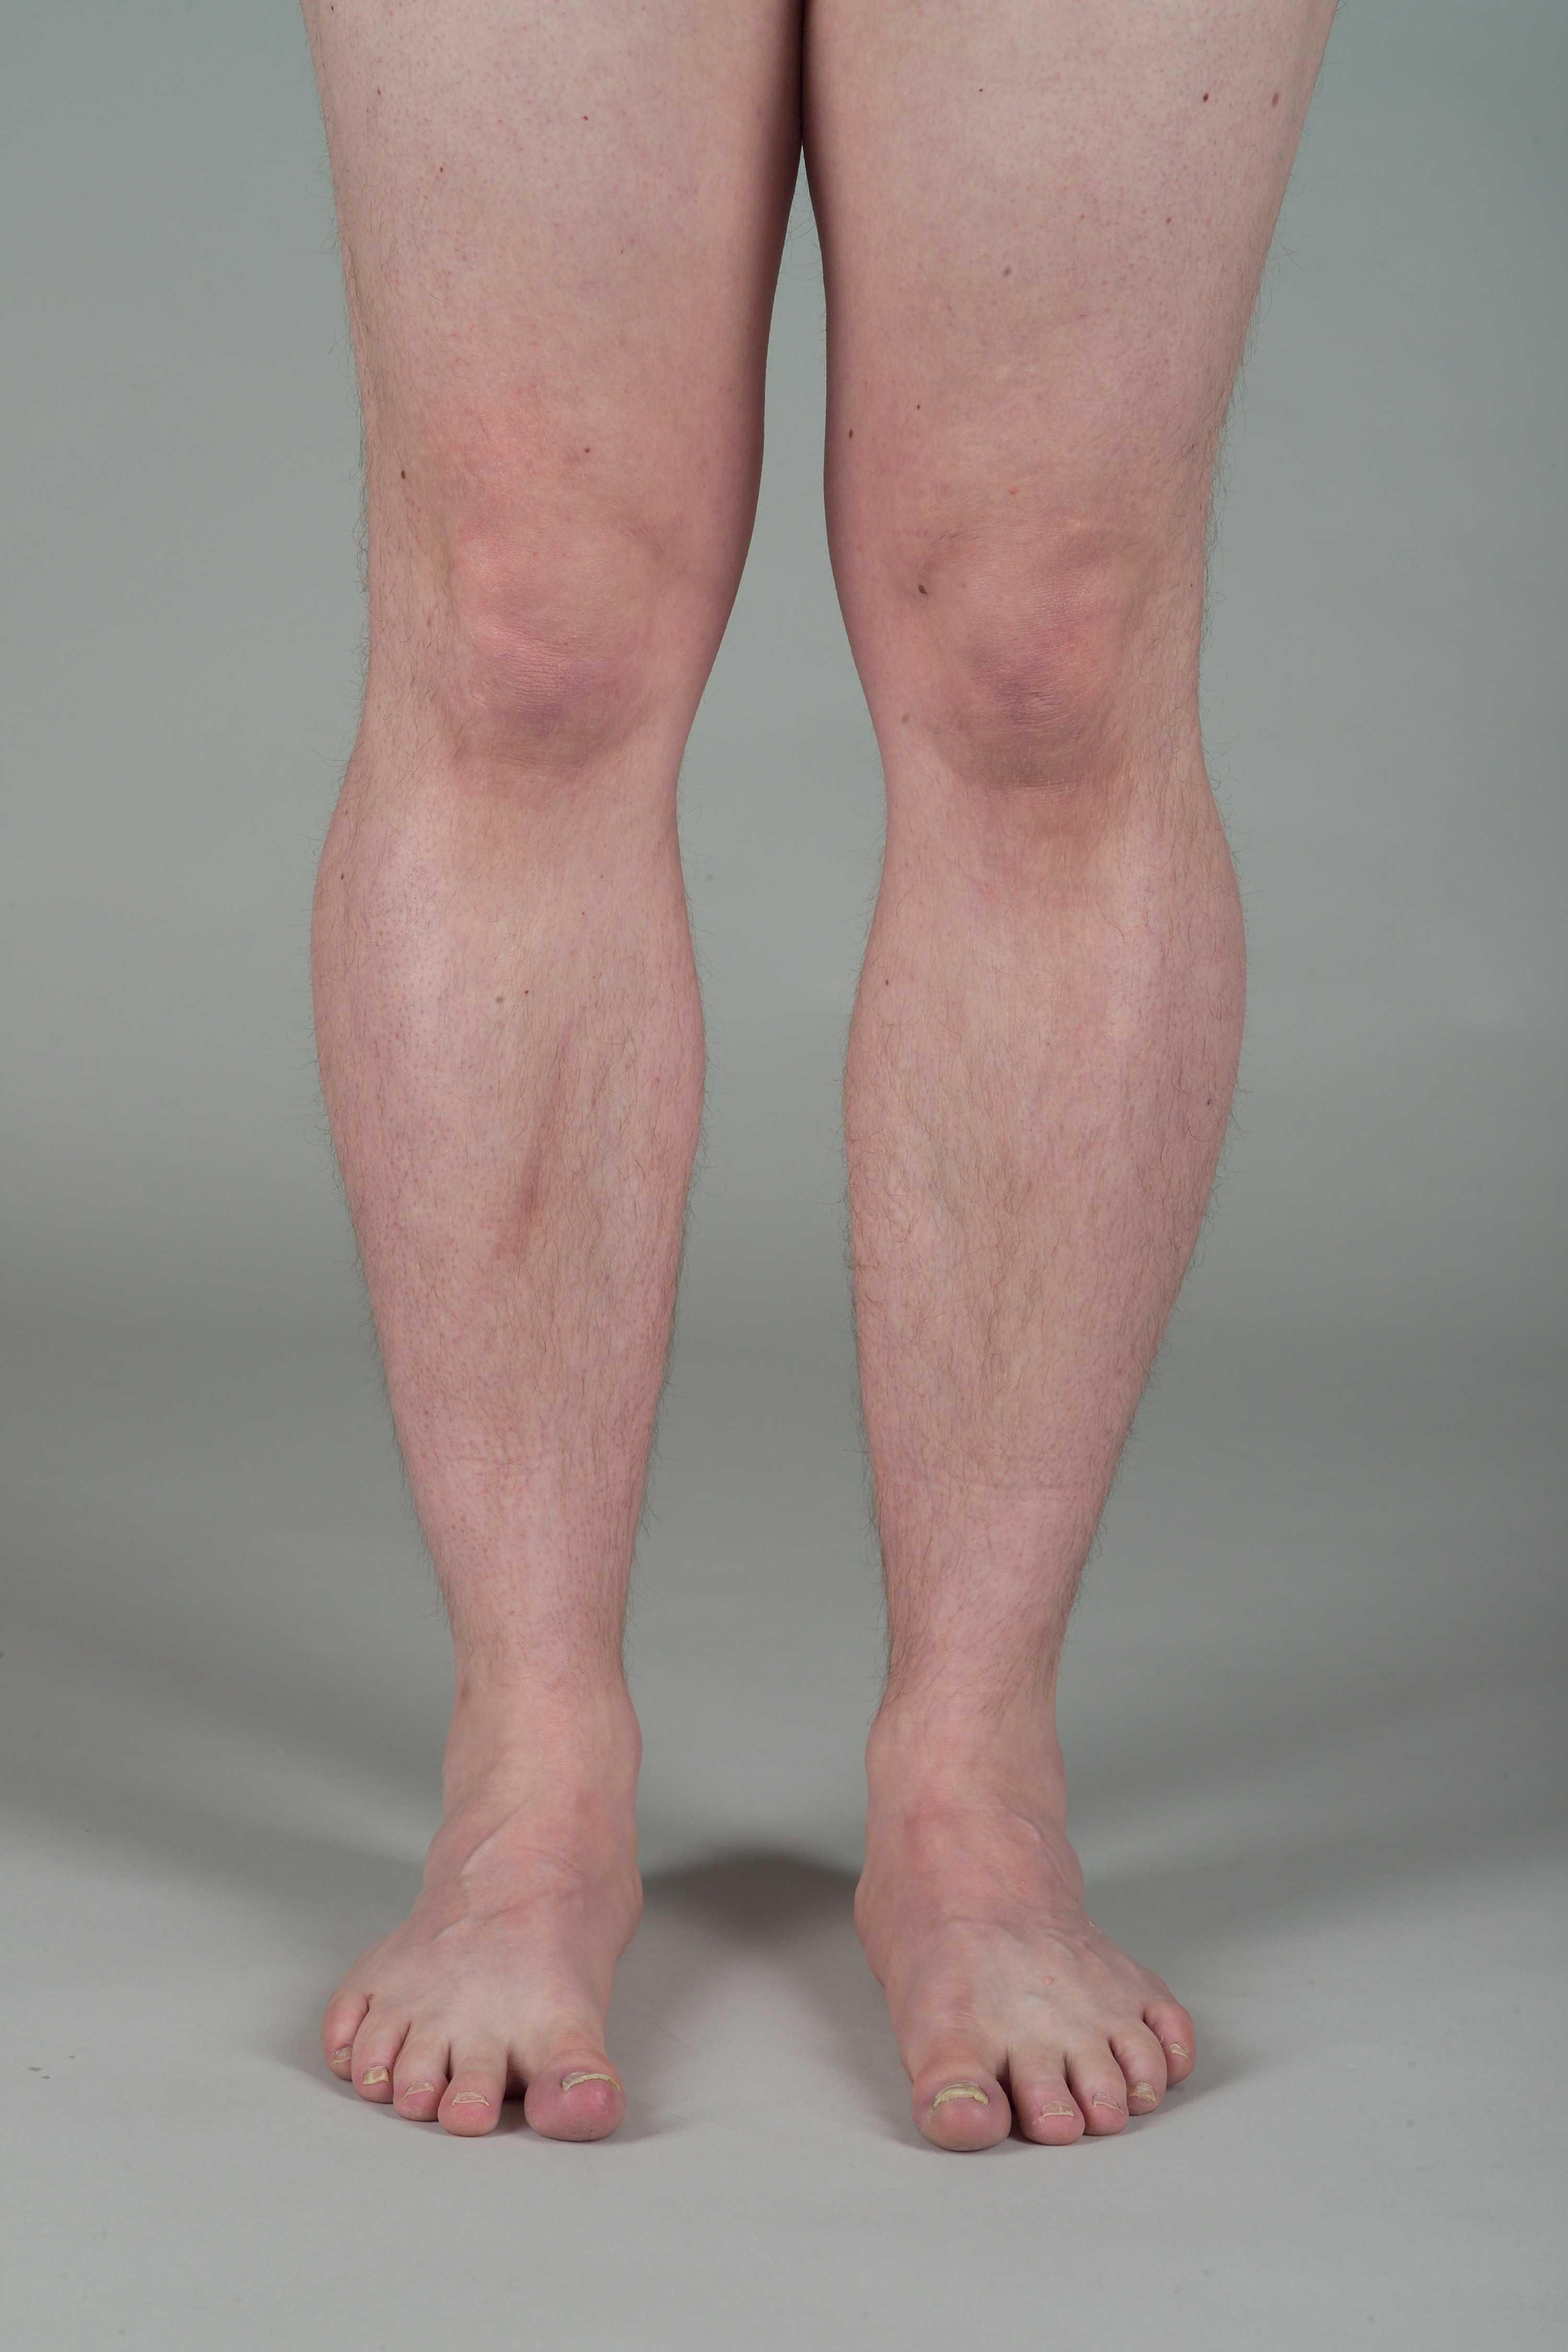

In [10]:
from IPython.display import Image
Image("../../../nci/04_050.jpg")

### When is compression too high? What constitutes image quality?

## Data compression tools

There are a variety of compression tools and algorithms available. We are going to be sticking with a common compression tool ``gzip`` (``gunzip``).

* [``gzip``](https://www.gnu.org/software/gzip/manual/gzip.html) compresses a file. By default it replaces the named file with a compressed version
* [``gunzip``](https://www.gnu.org/software/gzip/manual/gzip.html) takes a compressed file and replaces it with the uncompressed version.

#### To demonstrate this, let's make a directory and copy some of the files from ``~/DATA/Misc``.

In [11]:
%%bash

mkdir ~/work/compression
cp ~/DATA/Misc/carotid.txt ~/work/compression/
cd ~/work/compression

ls -l
gzip carotid.txt
ls -l

gunzip carotid.txt.gz
ls -l


total 49
-rwxr-xr-x 1 rgrotewold users 49361 Jul  3 17:01 carotid.txt
total 9
-rwxr-xr-x 1 rgrotewold users 8547 Jul  3 17:01 carotid.txt.gz
total 49
-rwxr-xr-x 1 rgrotewold users 49361 Jul  3 17:01 carotid.txt


#### We can use the ``-c`` with the redirect operator (``>``) option to write the compressed file to a new file rather than replacing the source file

* Remember we don't have write permission in ``~/DATA/Misc``.
* What happens if you try to compress a file in ``~/DATA/Misc``?

In [12]:
%%bash

gzip -c ~/DATA/Misc/Accidents7904.csv > ~/work/compression/Accidents7904.csv.gz
ls -l ~/work/compression

total 131987
-rw-r--r-- 1 rgrotewold users 135104454 Jul  3 17:08 Accidents7904.csv.gz
-rwxr-xr-x 1 rgrotewold users     49361 Jul  3 17:01 carotid.txt


#### We can use the -l option to see what the compression rate is on a compressed file


In [13]:
%%bash
gzip -l ~/work/compression/Accidents7904.csv.gz

         compressed        uncompressed  ratio uncompressed_name
          135104454           755035667  82.1% /home/rgrotewold/work/compression/Accidents7904.csv


### How effectively can we compress different types of files?

## Exercise

Run each of the command pairs below. Which files compress the most?

In [14]:
%%bash
gzip -c ~/DATA/Misc/carotid.txt > ~/work/compression/carotid.txt.gz
gzip -l ~/work/compression/carotid.txt.gz

gzip -c ~/DATA/Images/PE/Ser_000006/IM-0124-0097.dcm > ~/work/compression/IM-0124-0097.dcm
gzip -l ~/work/compression/IM-0124-0097.dcm

gzip -c ~/work/nci/04.jpg > ~/work/compression/04.jpg.gz
gzip -l ~/work/compression/04.jpg.gz

gzip -c ~/work/nci/04_.tiff > ~/work/compression/04_.tiff.gz
gzip -l ~/work/compression/04_.tiff.gz

         compressed        uncompressed  ratio uncompressed_name
               8547               49361  82.7% /home/rgrotewold/work/compression/carotid.txt
         compressed        uncompressed  ratio uncompressed_name
             289567              528354  45.2% /home/rgrotewold/work/compression/IM-0124-0097.dcm


gzip: /home/rgrotewold/work/nci/04.jpg: No such file or directory

gzip: /home/rgrotewold/work/compression/04.jpg.gz: unexpected end of file
gzip: /home/rgrotewold/work/nci/04_.tiff: No such file or directory

gzip: /home/rgrotewold/work/compression/04_.tiff.gz: unexpected end of file


#### Compare the size of ``04_.tiff.gz`` to ``04.jpg``

## [``tar``](http://linuxcommand.org/man_pages/tar1.html)

``tar`` stands for **t**ape **ar**chive. It can be used to create a single file archive of a directory structure. Like most Unix programs, there are many, many options. Here are a few of the common ways that I use tar:

### Create a compressed archive

```bash
tar cvf ~/Modules.tar Modules
```

This creates an archive of the directory ``Modules`` named ``Modules.tar`` in the home directory.

```bash
tar cvfz ~/Modules.tgz Modules
```

Same as the command above, but compresses the archive with ``gzip``.

```bash

tar cvfz ~/notebooks.tgz `find ./Modules -name '*.ipynb'`
```

Creates an archive of all the ``.ipynb`` files found in ``./Modules``.

```bash
tar xvfz ~/notebooks.tgz -C ~/work/compression
```

Extracts the archive in ``~/work/compression``

```bash
tar tvfz ~/notebooks.tgz
```

Prints a table of contents for ``~/notebooks.tgz``.



## Exercise

Test if the following command works. Edit as needed. Explain to your neighbor the parts of the command:

```bash

find . -name '*.ipynb'  | grep -v ".ipynb_checkpoints" | tar cvfz ~/a2.tgz -T -
```

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">University of Uah Data Science for Health</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Brian E. Chapman</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.